In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank.csv')
df.columns = ['a', 'b', 'c', 'd', 'label']
df.head()

,a,b,c,d,label
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


# Xem hệ số tương quan giữa các biến với labels

<IPython.core.display.Javascript object>


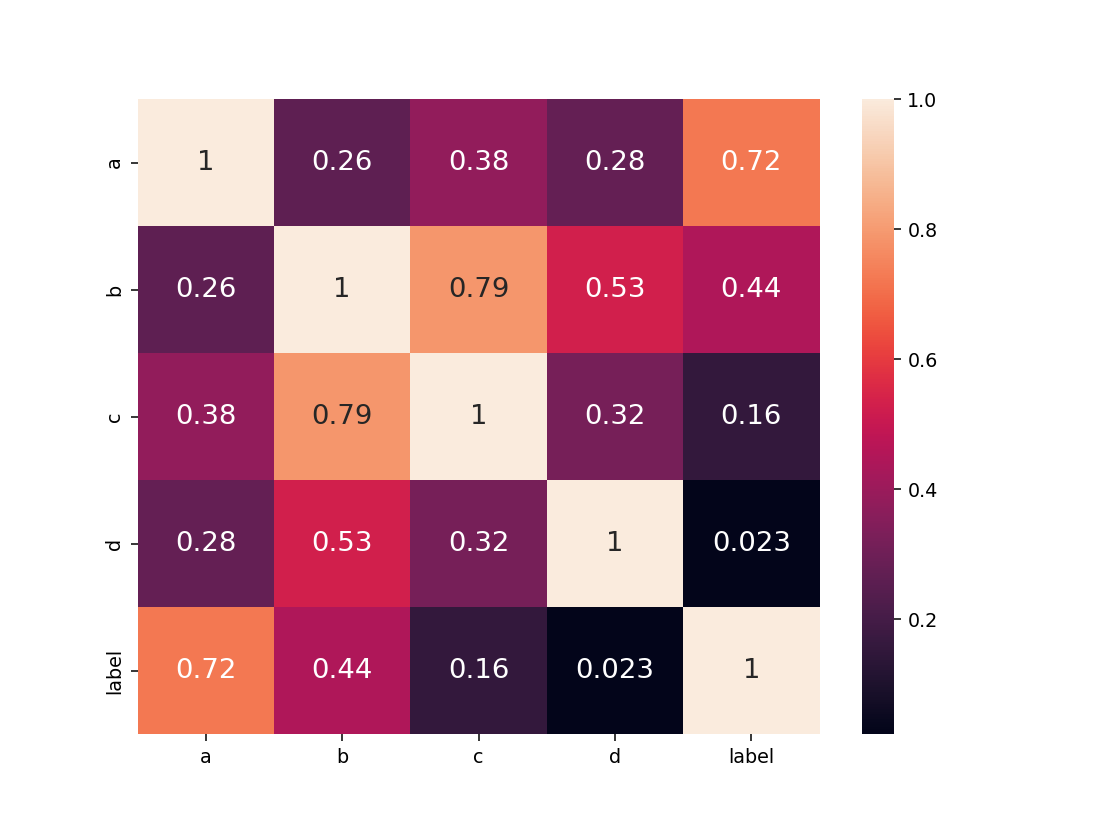

In [98]:
plt.figure(figsize=(8,6))
sns.heatmap(abs(df.corr()), annot=True, annot_kws={'size': 'x-large'});

mối tương quan giữa d và label là 0.023
d không cung cấp thông tin cho label

In [3]:
X = df.drop(['d', 'label'], axis=1)
y = df['label']

In [6]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<IPython.core.display.Javascript object>


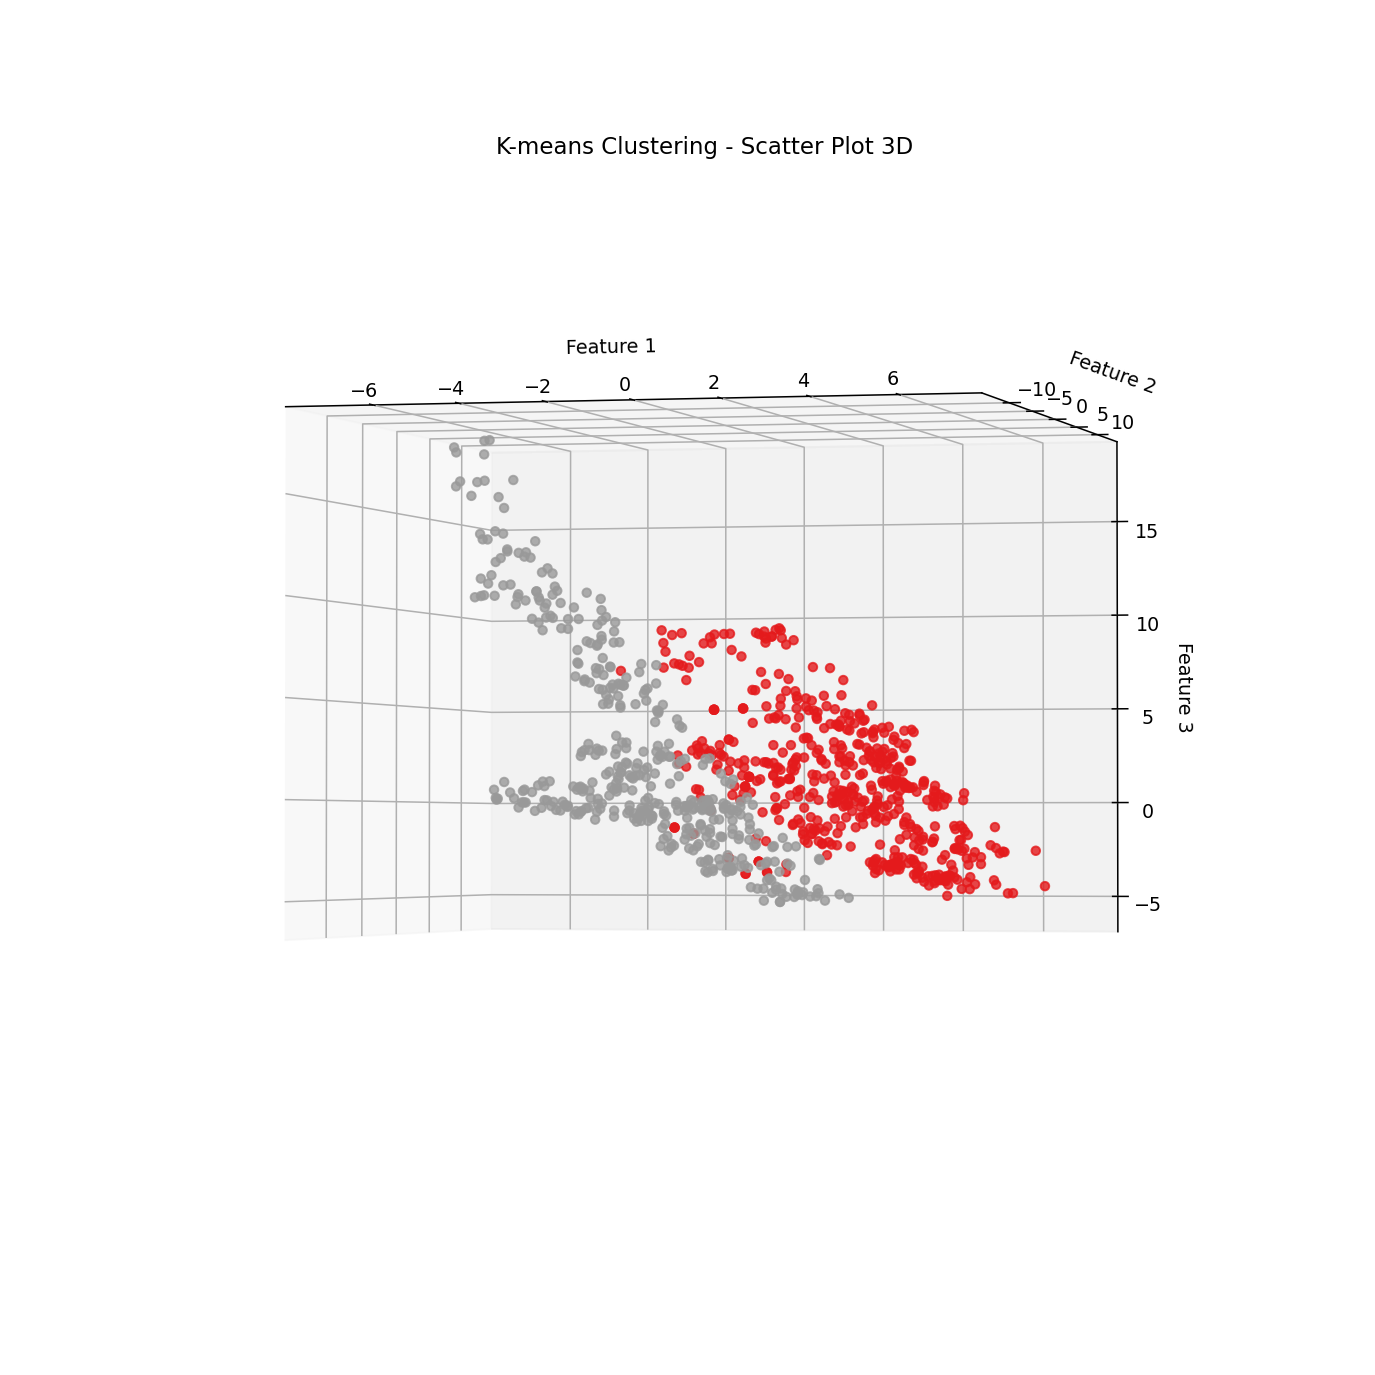

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def plot_cluster_3d(matrix, labels):
    # Kích hoạt chế độ interactivity
    %matplotlib notebook
    
    # Tạo figure và axis
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Vẽ biểu đồ scatter 3D
    scatter = ax.scatter(matrix[:, 0], matrix[:, 1], matrix[:, 2], c=labels, cmap='Set1')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    
    # Thiết lập độ trong suốt cho điểm dữ liệu
    scatter.set_alpha(0.8)
    
    # Hàm update để xoay đồ thị
    def update_rotation(num, scatter, ax):
        ax.view_init(elev=30, azim=num)
    
    # Tạo animation để xoay đồ thị 3D
    rotation_animation = animation.FuncAnimation(fig, update_rotation, frames=range(0, 720), fargs=(scatter, ax), interval=50)
    
    # Hiển thị biểu đồ
    plt.title('K-means Clustering - Scatter Plot 3D')
    plt.show()

# Gọi hàm plot_cluster_3d với ma trận đặc trưng X và nhãn y
plot_cluster_3d(X_train.values, y_train)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings

def svm_gridsearch(X_train, y_train, X_test, y_test):
    # Create a pipeline with StandardScaler and LinearSVC
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', LinearSVC())
    ])

    # Define the parameter grid for C and class_weight
    param_grid = {
        'svc__C': [0.1, 1, 10],
        'svc__class_weight': [None, 'balanced'],
        'svc__max_iter': [1000, 5000],
        
    }

    # Create GridSearchCV to search over the parameter grid with cross-validation
    grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)


    # Retrieve the best estimator, intercept, and coefficients
    best_svc = grid_search.best_estimator_.named_steps['svc']
    b = best_svc.intercept_[0]
    w = best_svc.coef_[0]
    warnings.filterwarnings("ignore")
    # Find the support vectors using the decision function
    support_vector_indices = np.where(np.abs(best_svc.decision_function(X_train.values)) <= 1)[0]
    support_vectors = X_train.values[support_vector_indices]
    return b, w, support_vectors

# Example usage
b, w, vectors = svm_gridsearch(X_train, y_train, X_test, y_test)


<IPython.core.display.Javascript object>


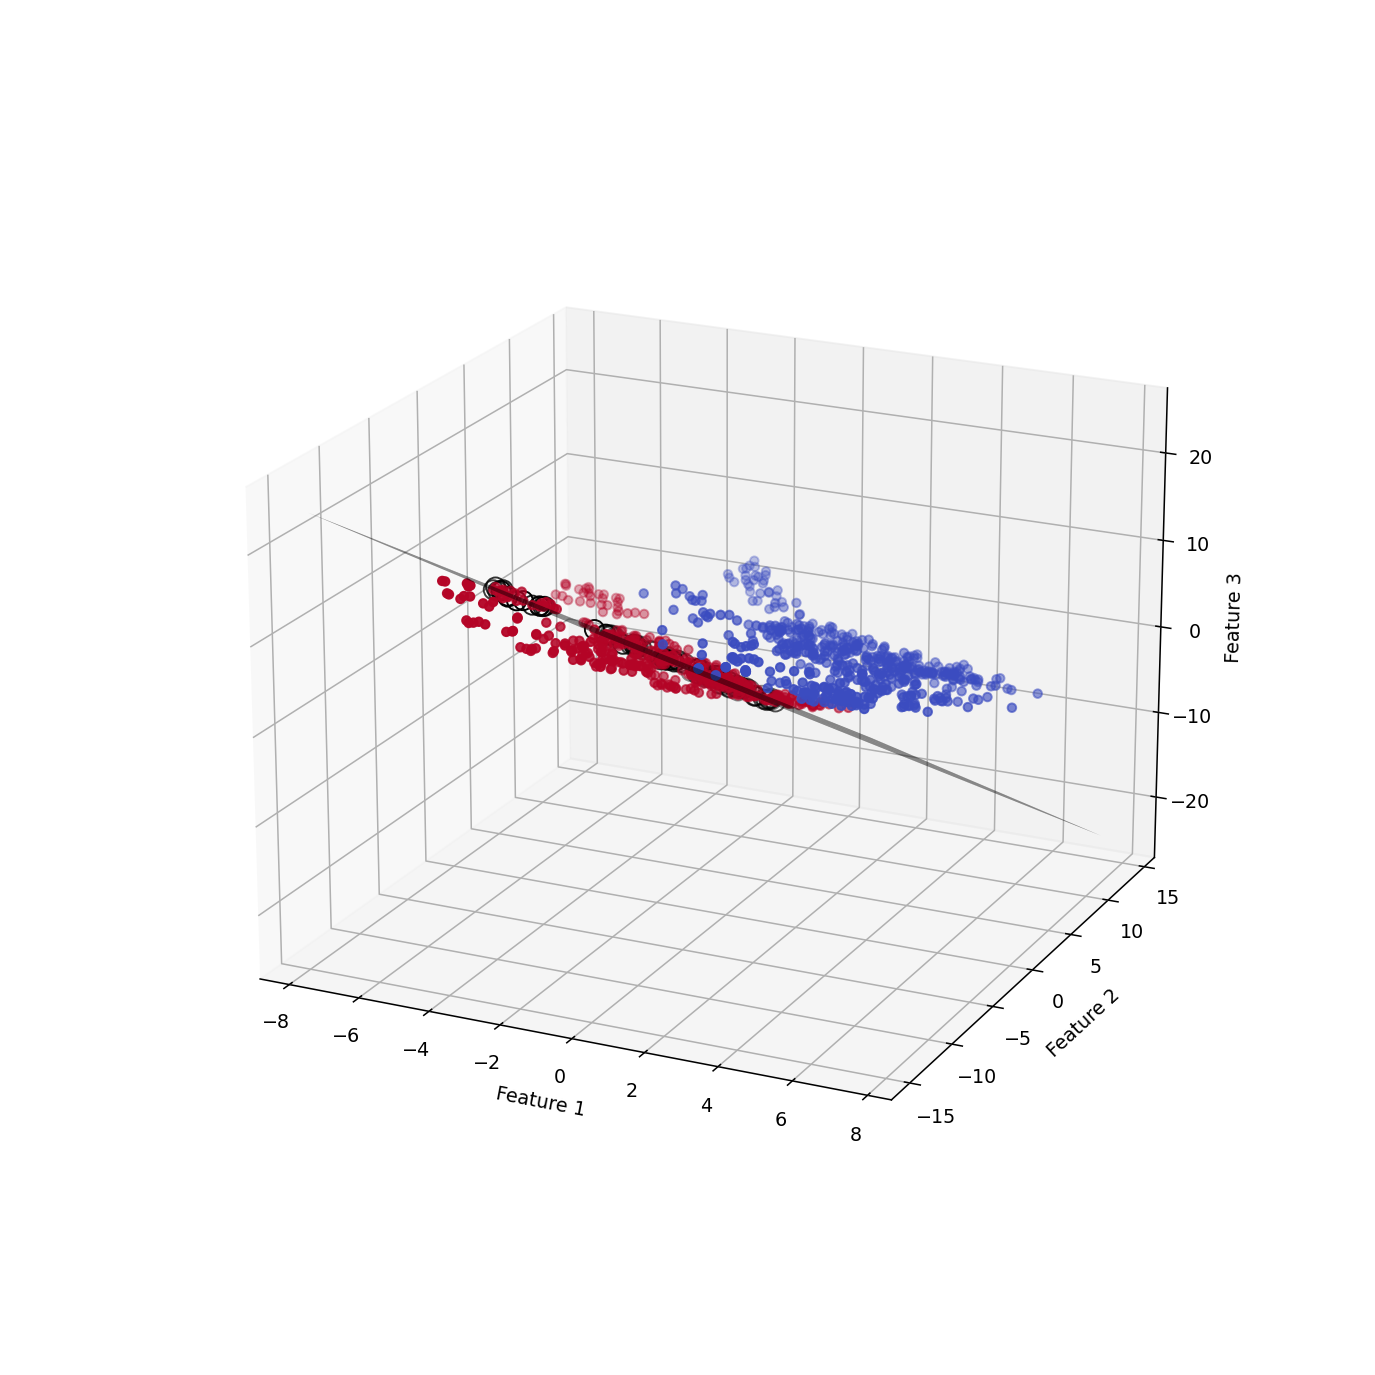

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_hyperplane(X, y, w, b, support_vectors):
    """
    Trực quan hóa kết quả của các vector hỗ trợ trên dữ liệu ba chiều.
    
    Parameters:
    X (array-like): mảng chứa các đặc trưng của dữ liệu.
    y (array-like): mảng chứa nhãn của dữ liệu.
    w (array-like): mảng chứa vector trọng số của mô hình SVM.
    b (float): độ lệch (bias) của mô hình SVM.
    support_vectors (array-like): mảng chứa các vector hỗ trợ.
    
    Returns:
    None
    """
    
    # Tạo figure và axis
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Vẽ biểu đồ scatter 3D
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    
    # Vẽ các vector hỗ trợ
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2],
               s=100, facecolors='none', edgecolors='k')
    
    # Vẽ đường ranh giới phân loại
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10))
    zz = (-b - w[0]*xx - w[1]*yy) / w[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5, color='black')
    
    # Hiển thị biểu đồ
    plt.show()

plot_hyperplane(X_train.values, y_train, w, b, vectors)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def svm_fit(X, y):
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Tạo mô hình SVM với kernel tuyến tính và tham số C=10
    clf = SVC(kernel='linear', C=10)
    clf.fit(X_scaled, y)
    # Lấy thông số b, w và các vector hỗ trợ
    b = clf.intercept_[0]
    w = clf.coef_[0]
    support_vectors = clf.support_vectors_

    return b, w, support_vectors

b1, w1, vectors1 = ksvm(X_train.values, y_train)



<IPython.core.display.Javascript object>


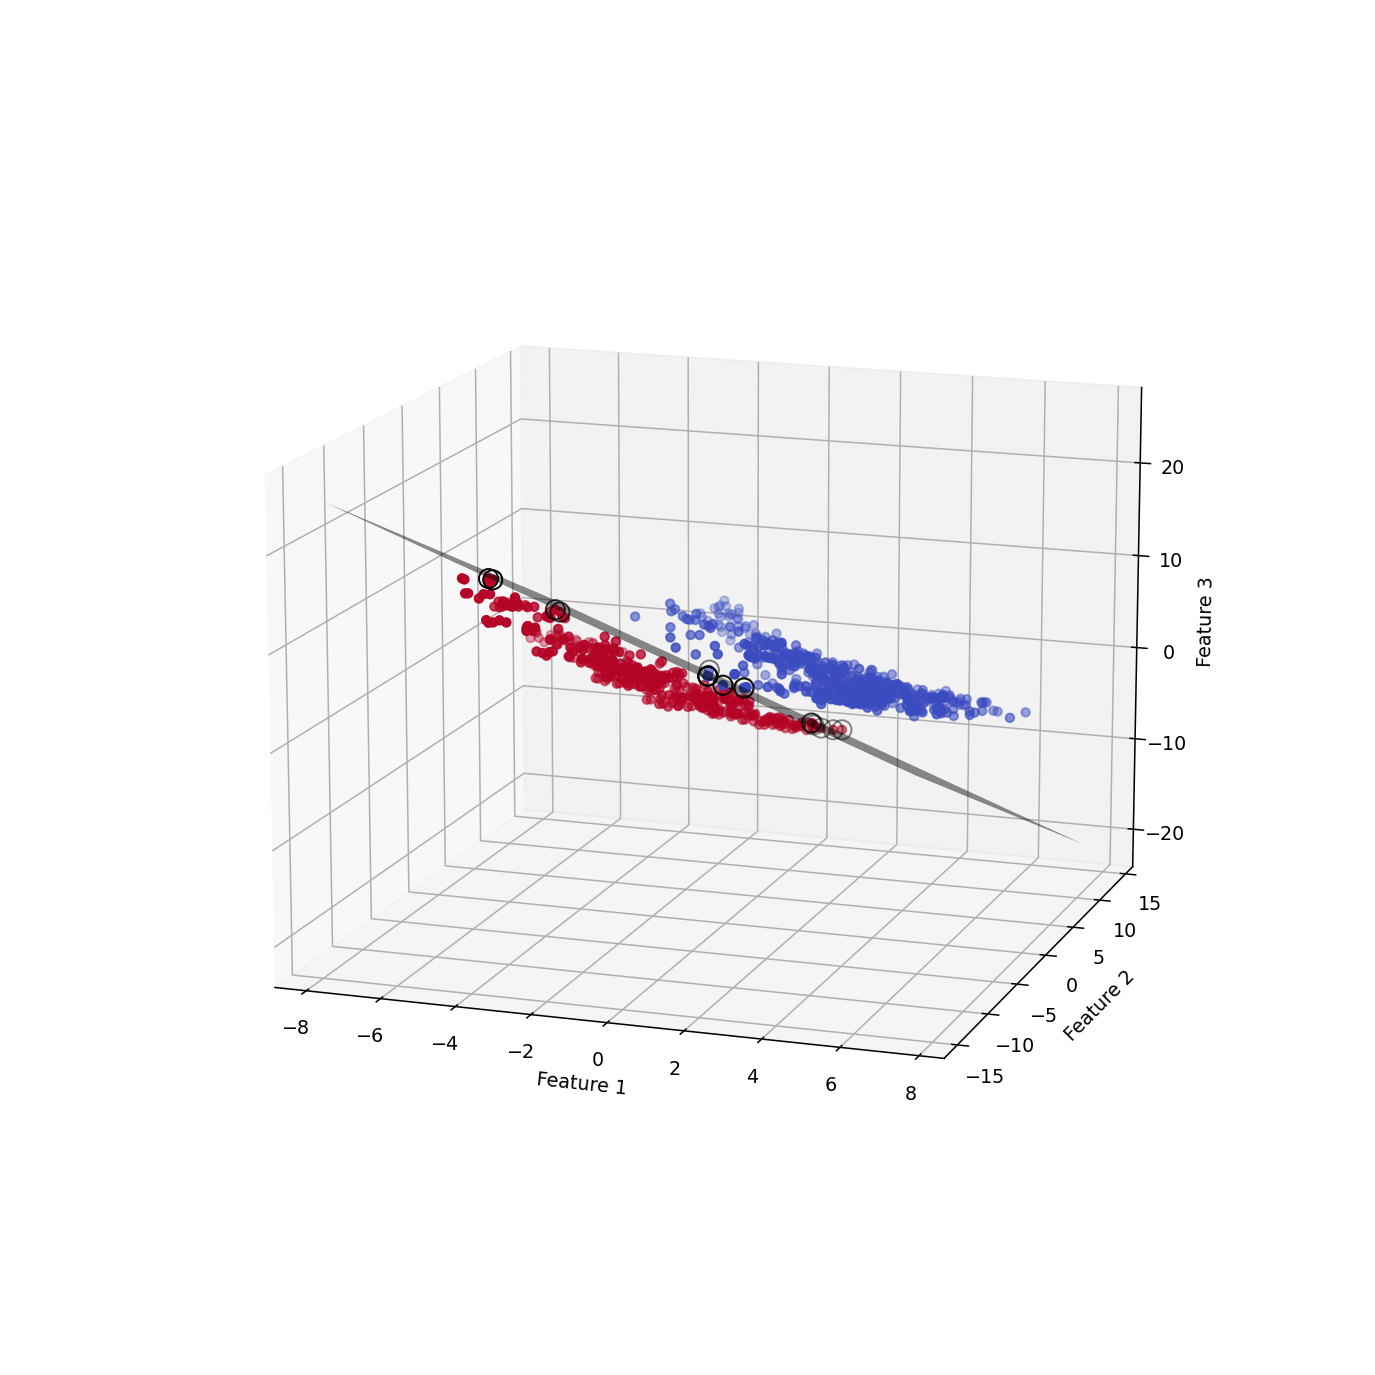

In [33]:

plot_svm_3d(X_train.values, y_train, w1, b1, vectors1)

<IPython.core.display.Javascript object>


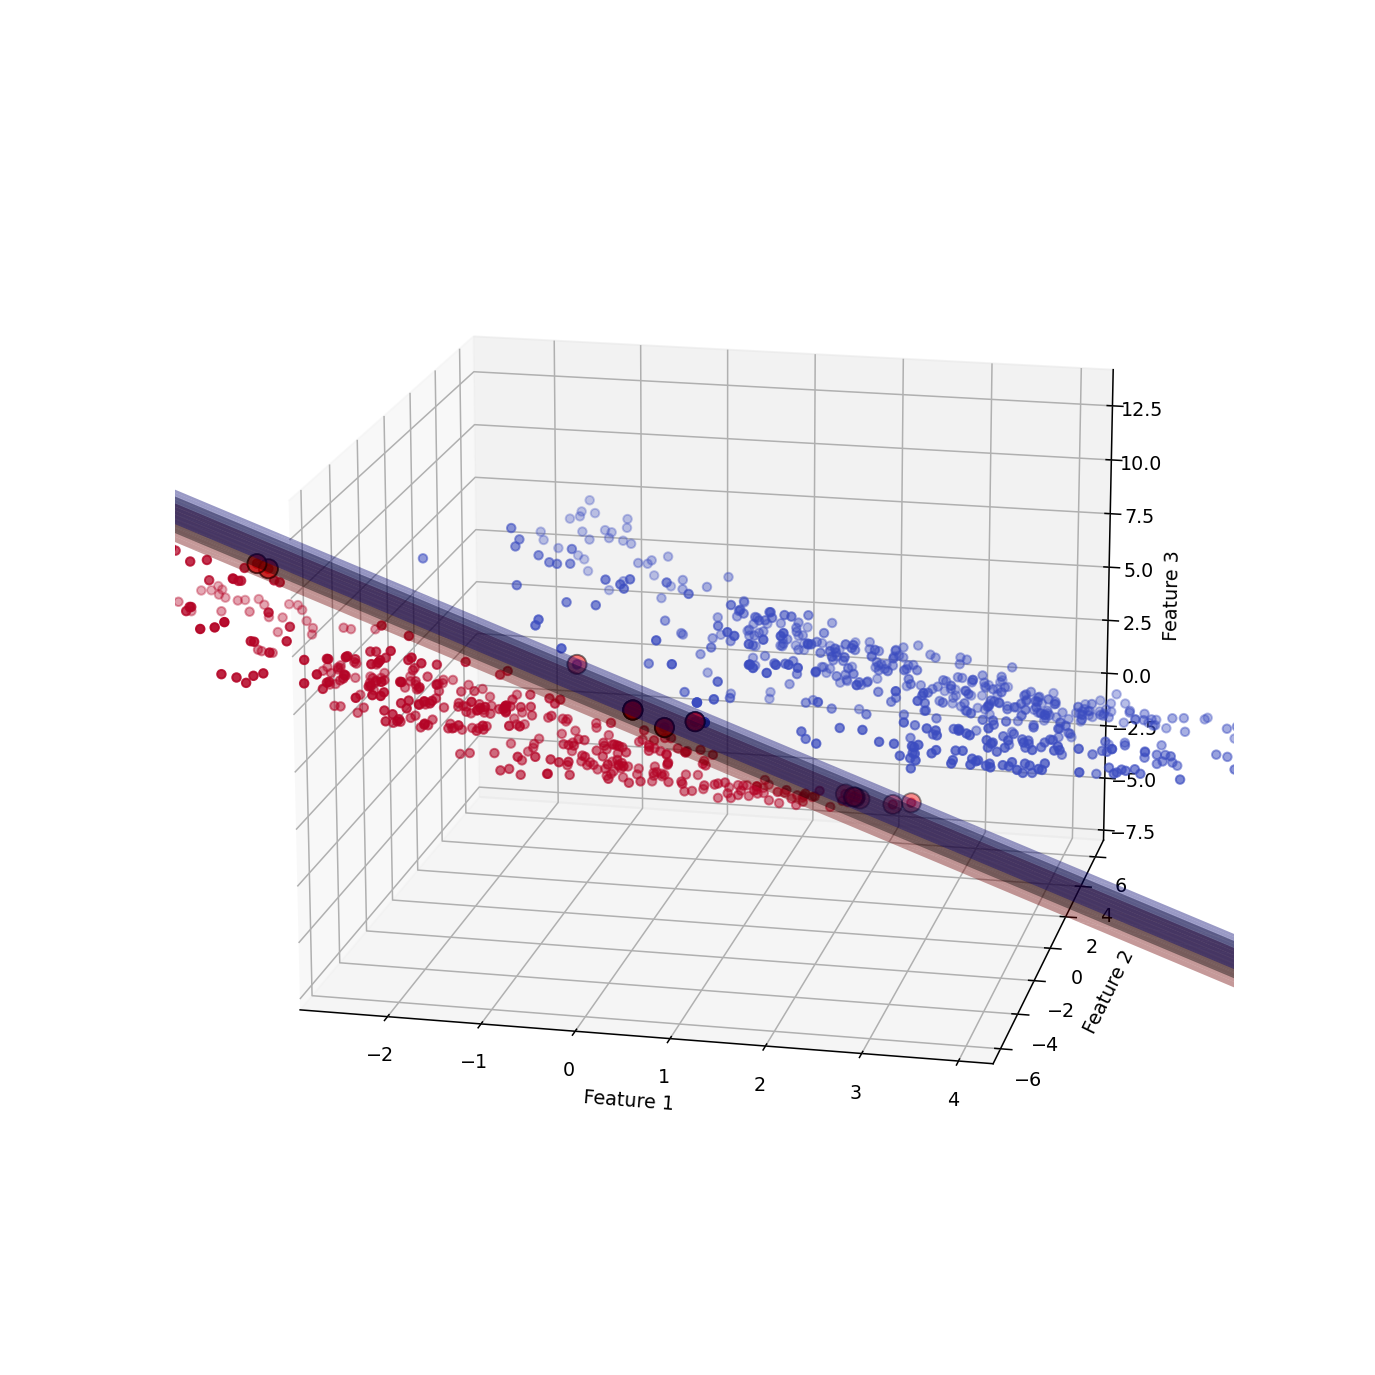

In [34]:
def plot_svm_hyperplane(X, y, w, b, vector):
    """
    Trực quan hóa siêu phẳng lề lớn nhất trong SVM bằng cách vẽ hai mặt phẳng.

    Parameters:
    X (array-like): Mảng chứa các đặc trưng của dữ liệu.
    y (array-like): Mảng chứa nhãn của dữ liệu.
    w (array-like): Mảng chứa vector hướng của siêu phẳng.
    b (float): Giá trị về sai số của siêu phẳng.
    vector (array-like): Mảng chứa các vector hỗ trợ.

    Returns:
    None
    """

    # Kích hoạt chế độ interactivity
    %matplotlib notebook
    
    # Tạo figure và axis
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Vẽ biểu đồ scatter 3D
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    
    # Vẽ các vector hỗ trợ
    ax.scatter(vector[:, 0], vector[:, 1], vector[:, 2],
               s=100, facecolors='red', edgecolors='k')

    # Xác định ranh giới phân loại
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10))
    zz = (-b - w[0]*xx - w[1]*yy) / w[2]
    
    zz1 = (1 -b - w[0]*xx - w[1]*yy) / w[2]
    
    zz2 = (-1-b - w[0]*xx - w[1]*yy) / w[2]
    # Vẽ mặt phẳng phân loại
    ax.plot_surface(xx, yy, zz, alpha=0.4, color='black')
    
    # Vẽ mặt phẳng phía âm của siêu phẳng lề lớn nhất
    ax.plot_surface(xx, yy, zz1, alpha=0.4, color='red')
    
    # Vẽ mặt phẳng phía dương của siêu phẳng lề lớn nhất
    ax.plot_surface(xx, yy, zz2, alpha=0.4, color='blue')

    
    
    
    # Hàm update để xoay đồ thị
    def update_rotation(num, scatter, ax):
        ax.view_init(elev=30, azim=num)
    
    # Tạo animation để xoay đồ thị 3D
    rotation_animation = animation.FuncAnimation(fig, update_rotation, frames=range(0, 360), fargs=(scatter, ax), interval=50)
    
    # Hiển thị biểu đồ
    plt.show()
    
plot_svm_hyperplane(X_train.values, y_train, w1, b1, vectors1)

In [37]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def svm_predict(X_train, y_train, X_test, y_test):
    # Tạo pipeline với StandardScaler và SVC
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear'))
    ])

    # Huấn luyện mô hình trên tập huấn luyện
    pipe.fit(X_train, y_train)

    # Dự đoán nhãn cho tập huấn luyện và tập kiểm tra
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Tính toán các độ đo
    train_report = classification_report(y_train, y_train_pred)
    test_report = classification_report(y_test, y_test_pred)

    # In kết quả các độ đo
    print("Train Classification Report:")
    print(train_report)
    print("Test Classification Report:")
    print(test_report)

    return train_report, test_report

# Áp dụng SVM và tính toán các độ đo trên tập huấn luyện và tập kiểm tra
train_report, test_report = svm_predict(X_train, y_train, X_test, y_test)


Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       532
           1       0.98      1.00      0.99       427

    accuracy                           0.99       959
   macro avg       0.99      0.99      0.99       959
weighted avg       0.99      0.99      0.99       959

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       229
           1       0.97      1.00      0.98       183

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

